In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import calliope

In [29]:
model_run = 4
model = calliope.read_netcdf(f"../calliope_model/0{model_run}-calliope-results/0{model_run}-res.nc")

In [30]:
ds = model.results

In [31]:
ds

<xarray.Dataset>
Dimensions:                                 (loc_techs: 3,
                                             loc_tech_carriers_prod: 2,
                                             timesteps: 8760,
                                             loc_tech_carriers_con: 2,
                                             costs: 1, loc_techs_cost: 2,
                                             loc_techs_store: 1,
                                             ...
                                             loc_techs_investment_cost: 2,
                                             loc_carriers: 1,
                                             loc_techs_cost_investment_constraint: 2,
                                             loc_carriers_system_balance_constraint: 1,
                                             loc_techs_balance_demand_constraint: 1,
                                             carriers: 1, techs: 6)
Coordinates: (12/15)
  * techs                                   (techs) object 'ac_transmission' ...
  * costs                                   (costs) object 'monetary'
  * loc_carriers                            (loc_carriers) object 'region1::p...
  * loc_carriers_system_balance_constraint  (loc_carriers_system_balance_constraint) object ...
  * loc_tech_carriers_con                   (loc_tech_carriers_con) object 'r...
  * loc_tech_carriers_prod                  (loc_tech_carriers_prod) object '...
    ...                                      ...
  * loc_techs_cost_investment_constraint    (loc_techs_cost_investment_constraint) object ...
  * loc_techs_investment_cost               (loc_techs_investment_cost) object ...
  * loc_techs_om_cost                       (loc_techs_om_cost) object 'regio...
  * loc_techs_store                         (loc_techs_store) object 'region1...
  * timesteps                               (timesteps) datetime64[ns] 2023-0...
  * carriers                                (carriers) object 'power'
Data variables: (12/17)
    energy_cap                              (loc_techs) float64 1.198e+05 ......
    carrier_prod                            (loc_tech_carriers_prod, timesteps) float64 ...
    carrier_con                             (loc_tech_carriers_con, timesteps) float64 ...
    cost                                    (costs, loc_techs_cost) float64 3...
    storage_cap                             (loc_techs_store) float64 1.927e+03
    storage                                 (loc_techs_store, timesteps) float64 ...
    ...                                      ...
    system_balance                          (loc_carriers_system_balance_constraint, timesteps) float64 ...
    required_resource                       (loc_techs_balance_demand_constraint, timesteps) float64 ...
    capacity_factor                         (timesteps, loc_tech_carriers_prod) float64 ...
    systemwide_capacity_factor              (carriers, techs) float64 nan ......
    systemwide_levelised_cost               (carriers, costs, techs) float64 ...
    total_levelised_cost                    (carriers, costs) float64 0.05551
Attributes:
    termination_condition:     optimal
    objective_function_value:  35580220.476268776
    solution_time:             9.861451
    time_finished:             2024-03-21 16:00:33
    calliope_version:          0.6.10
    applied_overrides:         
    scenario:                  None
    defaults:                  carrier_ratios:\ncharge_rate:\nenergy_cap_per_...
    allow_operate_mode:        1
    model_config:              calliope_version: 0.6.10\nname: MISO Single Re...
    run_config:                backend: pyomo\nbigM: 1000000.0\ncyclic_storag...

In [32]:
ds.loc_tech_carriers_prod

<xarray.DataArray 'loc_tech_carriers_prod' (loc_tech_carriers_prod: 2)>
array(['region1::ccgt::power', 'region1::battery::power'], dtype=object)
Coordinates:
  * loc_tech_carriers_prod  (loc_tech_carriers_prod) object 'region1::ccgt::p...

In [33]:
ds.loc_carriers

<xarray.DataArray 'loc_carriers' (loc_carriers: 1)>
array(['region1::power'], dtype=object)
Coordinates:
  * loc_carriers  (loc_carriers) object 'region1::power'

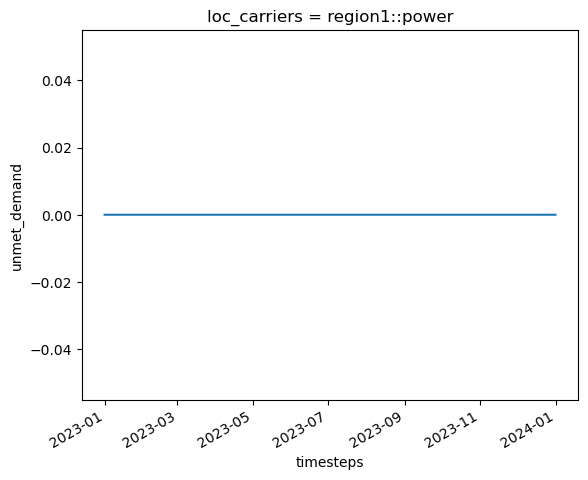

In [34]:
ds.unmet_demand.sel(loc_carriers="region1::power").plot()

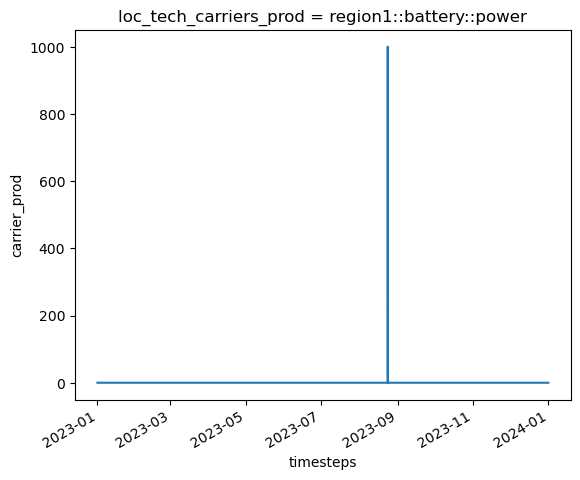

In [35]:
ds.carrier_prod.sel(loc_tech_carriers_prod='region1::battery::power').plot()

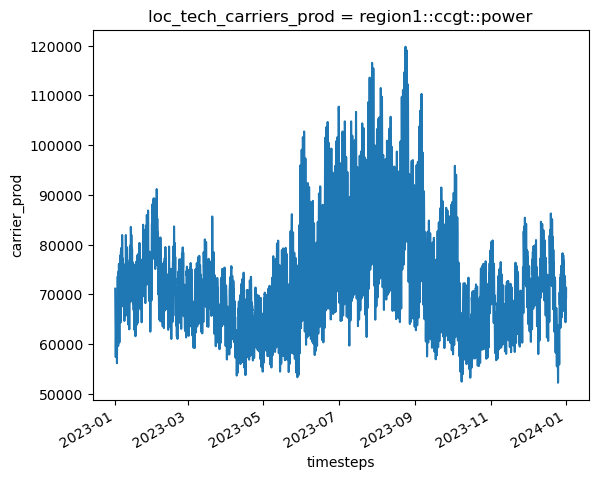

In [36]:
ds.carrier_prod.sel(loc_tech_carriers_prod="region1::ccgt::power").plot()